**LWR - Built-in Libraries**

In [1]:
import numpy as np
from bokeh.plotting import figure, show, output_notebook
from bokeh.layouts import gridplot
from bokeh.io import push_notebook

def local_regression(x0, X, Y, tau):# add bias term
 x0 = np.r_[1, x0] # Add one to avoid the loss in information
 X = np.c_[np.ones(len(X)), X]

 # fit model: normal equations with kernel
 xw = X.T * radial_kernel(x0, X, tau) # XTranspose * W

 beta = np.linalg.pinv(xw @ X) @ xw @ Y #@ Matrix Multiplication or Dot Product


 # predict value
 return x0 @ beta # @ Matrix Multiplication or Dot Product for prediction
def radial_kernel(x0, X, tau):
 return np.exp(np.sum((X - x0) ** 2, axis=1) / (-2 * tau * tau))
# Weight or Radial Kernal Bias Function

n = 1000
# generate dataset
X = np.linspace(-3, 3, num=n)
print("The Data Set ( 10 Samples) X :\n",X[1:10])
Y = np.log(np.abs(X ** 2 - 1) + .5)
print("The Fitting Curve Data Set (10 Samples) Y :\n",Y[1:10])
# jitter X
X += np.random.normal(scale=.1, size=n)
print("Normalised (10 Samples) X :\n",X[1:10])

domain = np.linspace(-3, 3, num=300)
print(" Xo Domain Space(10 Samples) :\n",domain[1:10])

def plot_lwr(tau):
 # prediction through regression
 prediction = [local_regression(x0, X, Y, tau) for x0 in domain]
 plot = figure(plot_width=400, plot_height=400)
 plot.title.text='tau=%g' % tau
 plot.scatter(X, Y, alpha=.3)
 plot.line(domain, prediction, line_width=2, color='red')
 return plot

show(gridplot([
 [plot_lwr(10.), plot_lwr(1.)],
 [plot_lwr(0.1), plot_lwr(0.01)]]))

The Data Set ( 10 Samples) X :
 [-2.99399399 -2.98798799 -2.98198198 -2.97597598 -2.96996997 -2.96396396
 -2.95795796 -2.95195195 -2.94594595]
The Fitting Curve Data Set (10 Samples) Y :
 [2.13582188 2.13156806 2.12730467 2.12303166 2.11874898 2.11445659
 2.11015444 2.10584249 2.10152068]
Normalised (10 Samples) X :
 [-3.11216743 -3.04237702 -2.87207489 -3.06231933 -3.0124214  -2.99826669
 -2.98706874 -3.0501563  -2.93887645]
 Xo Domain Space(10 Samples) :
 [-2.97993311 -2.95986622 -2.93979933 -2.91973244 -2.89966555 -2.87959866
 -2.85953177 -2.83946488 -2.81939799]


**LWR without Built-in Libraries**

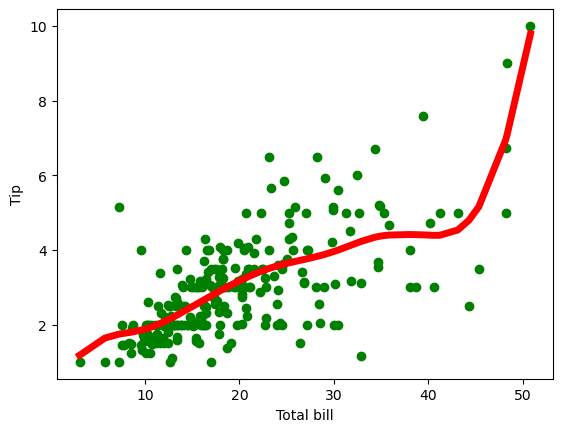

In [2]:
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np

def kernel(point,xmat, k): 
    m,n = np.shape(xmat)
    weights = np.mat(np.eye((m))) # eye - identity matrix 
    for j in range(m):
        diff = point - X[j]
        weights[j,j] = np.exp(diff*diff.T/(-2.0*k**2)) 
    return weights

def localWeight(point,xmat,ymat,k): 
    wei = kernel(point,xmat,k)
    W = (X.T*(wei*X)).I*(X.T*(wei*ymat.T)) 
    return W

def localWeightRegression(xmat,ymat,k): 
    m,n = np.shape(xmat)
    ypred = np.zeros(m) 
    for i in range(m):
        ypred[i] = xmat[i]*localWeight(xmat[i],xmat,ymat,k) 
    return ypred

def graphPlot(X,ypred):
    sortindex = X[:,1].argsort(0) #argsort - index of the smallest 
    xsort = X[sortindex][:,0]
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1) 
    ax.scatter(bill,tip, color='green')
    ax.plot(xsort[:,1],ypred[sortindex], color = 'red', linewidth=5) 
    plt.xlabel('Total bill')
    plt.ylabel('Tip') 
    plt.show();

# load data points
data = pd.read_csv('/kaggle/input/tipping/tips.csv')
bill = np.array(data.total_bill) # We use only Bill amount and Tips data 
tip = np.array(data.tip)

mbill = np.mat(bill) # .mat will convert nd array is converted in 2D array 
mtip = np.mat(tip)
m= np.shape(mbill)[1] 
one = np.mat(np.ones(m))
X = np.hstack((one.T,mbill.T)) # 244 rows, 2 cols

# increase k to get smooth curves
ypred = localWeightRegression(X,mtip,3) 
graphPlot(X,ypred)